# **Content-aware image restoration (CARE) 3D**

<font size = 4>CARE is a neural network based architecture for image enhancement, first published in 2018 by Weigert et al. in Nature Methods (see above). The network allows image restoration and resolution improvement in 2D and 3D images, in a supervised manner, using noisy images as input and low-noise images as targets for training.

<font size = 4>Once the user is familiarised with functions of CARE, it can be instructive to explore in-depth features and functions of CARE in [this guide](http://csbdeep.bioimagecomputing.com/doc/) provided by the authors.

---

<font size = 4>*Disclaimer*:

<font size = 4>This notebook is part of the Zero-Cost Deep-Learning to Enhance Microscopy project (https://github.com/HenriquesLab/DeepLearning_Collab/wiki). Jointly developed by the Jacquemet (link to https://cellmig.org/) and Henriques (https://henriqueslab.github.io/) laboratories.

<font size = 4>This notebook is largely based on the paper: **Content-aware image restoration: pushing the limits of fluorescence microscopy**, Nature Methods, Volume 15. pages 1090–1097(2018) by *Martin Weigert, Uwe Schmidt, Tobias Boothe, Andreas Müller, Alexandr Dibrov, Akanksha Jain, Benjamin Wilhelm, Deborah Schmidt, Coleman Broaddus, Siân Culley, Mauricio Rocha-Martins, Fabián Segovia-Miranda, Caren Norden, Ricardo Henriques, Marino Zerial, Michele Solimena, Jochen Rink, Pavel Tomancak, Loic Royer, Florian Jug & Eugene W. Myers* (https://www.nature.com/articles/s41592-018-0216-7)

<font size = 4>And source code found in: https://github.com/csbdeep/csbdeep

<font size = 4>More documentation on the CARE python package can be found here:
http://csbdeep.bioimagecomputing.com/doc/

<font size = 4>Original The training and test data of the restoration experiments: https://publications.mpi-cbg.de/publications-sites/7207/


<font size = 4>**Please also cite this original paper when using or developing this notebook.**

# **How to use this notebook?**

---

<font size = 4>Video describing how to use our notebooks are available on youtube:
  - [**Video 1**](https://www.youtube.com/watch?v=GzD2gamVNHI&feature=youtu.be): Full run through of the workflow to obtain the notebooks and the provided test datasets as well as a common use of the notebook
  - [**Video 2**](https://www.youtube.com/watch?v=PUuQfP5SsqM&feature=youtu.be): Detailed description of the different sections of the notebook


---
###**Structure of a notebook**

<font size = 4>The notebook contains two types of cell:  

<font size = 4>**Text cells** provide information and can be modified by douple-clicking the cell. You are currently reading the text cell. You can create a new text by clicking `+ Text`.

<font size = 4>**Code cells** contain code and the code can be modfied by selecting the cell. To execute the cell, move your cursor on the `[ ]`-mark on the left side of the cell (play button appears). Click to execute the cell. After execution is done the animation of play button stops. You can create a new coding cell by clicking `+ Code`.

---
###**Table of contents, Code snippets** and **Files**

<font size = 4>On the top left side of the notebook you find three tabs which contain from top to bottom:

<font size = 4>*Table of contents* = contains structure of the notebook. Click the content to move quickly between sections.

<font size = 4>*Code snippets* = contain examples how to code certain tasks. You can ignore this when using this notebook.

<font size = 4>*Files* = contain all available files. After mounting your google drive (see section 1.) you will find your files and folders here. 

<font size = 4>**Remember that all uploaded files are purged after changing the runtime.** All files saved in Google Drive will remain. You do not need to use the Mount Drive-button; your Google Drive is connected in section 1.2.

<font size = 4>**Note:** The "sample data" in "Files" contains default files. Do not upload anything in here!

---
###**Making changes to the notebook**

<font size = 4>**You can make a copy** of the notebook and save it to your Google Drive. To do this click file -> save a copy in drive.

<font size = 4>To **edit a cell**, double click on the text. This will show you either the source code (in code cells) or the source text (in text cells).
You can use the `#`-mark in code cells to comment out parts of the code. This allows you to keep the original code piece in the cell as a comment.

#**0. Before getting started**
---


<font size = 4>Before you run the notebook, please ensure that you are logged into your Google account and have the training and/or data to process in your Google Drive.

<font size = 4>For CARE to train, **it needs to have access to a paired training dataset**. This means that the same image needs to be acquired in the two conditions (for instance, low signal-to-noise ratio and high signal-to-noise ratio) and provided with indication of correspondence.

<font size = 4>Therefore, the data structure is important. It is necessary that all the input data are in the same folder and that all the output data is in a separate folder. The provided training dataset is already split in two folders called "Training - Low SNR images" (Training_source) and "Training - high SNR images" (Training_target). Information on how to generate a training dataset is available in our Wiki page: https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki

<font size = 4>**Additionally, the corresponding input and output files need to have the same name**.

<font size = 4>Please note that you currently can **only use .tif files!**

<font size = 4>You can also provide a folder that contains the data that you wish to analyse with the trained network once all training has been performed. This can include Test dataset for which you have the equivalent output and can compare to what the network provides.

<font size = 4>Here is a common data structure that can work:

*   Data
    - Training dataset
      - Training - Low SNR images (Training_source)
        - img_1.tif, img_2.tif, ...
      - Training - high SNR images (Training_target)
        - img_1.tif, img_2.tif, ...
    - Test dataset 
    - Results


<font size = 4>The **Results** folder will contain the processed images, trained model and network parameters as csv file. Your original images remain unmodified.


---
**Important note**

- If you wish to **Train a network from scratch** using your own dataset (and we encourage everyone to do that), you will need to run **sections 1 - 4**, then use **section 5** to run predictions on the model that was just trained.

- If you only wish to **run predictions** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 5** to run the predictions on the desired model.
---

# **1. Set the Runtime type and mount your Google Drive**
---

## **1.1. Set the Runtime type**
---

<font size = 4>Go to **Runtime -> Change the Runtime type**

<font size = 4>**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

<font size = 4>**Accelator: GPU** *(Graphics processing unit)*





In [1]:
#@title ##Run this cell to check if you have GPU access
%tensorflow_version 1.x

import tensorflow as tf
if tf.test.gpu_device_name()=='':
  print('You do not have GPU access.') 
  print('Did you change your runtime ?') 
  print('If the runtime settings are correct then Google did not allocate GPU to your session')
  print('Expect slow performance. To access GPU try reconnecting later')

else:
  print('You have GPU access')

from tensorflow.python.client import device_lib 
device_lib.list_local_devices()

TensorFlow 1.x selected.
You have GPU access


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13629894540257928354, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 13090316603843309359
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3036839102634579092
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 7470045594
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15706620508401502508
 physical_device_desc: "device: 0, name: Tesla P4, pci bus id: 0000:00:04.0, compute capability: 6.1"]

## **1.2. Mount your Google Drive**
---
<font size = 4> To use this notebook on the data present in your Google Drive, you need to mount your Google Drive to this notebook.

<font size = 4> Play the cell below to mount your Google Drive and follow the link. In the new browser window, select your drive and select 'Allow', copy the code, paste into the cell and press enter. This will give Colab access to the data on the drive. 

<font size = 4> Once this is done, your data are available in the **Files** tab on the top left of notebook.

In [1]:
#@markdown ##Play the cell to connect your Google Drive to Colab

#@markdown * Click on the URL. 

#@markdown * Sign in your Google Account. 

#@markdown * Copy the authorization code. 

#@markdown * Enter the authorization code. 

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive". 

# mount user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# **2. Install CARE and Dependencies**
---


In [3]:
#@markdown ##Install CARE and dependencies

#Libraries contains information of certain topics. 
#For example the tifffile library contains information on how to handle tif-files.

#Here, we install libraries which are not already included in Colab.
!pip install tifffile # contains tools to operate tiff-files
!pip install csbdeep  # contains tools for restoration of fluorescence microcopy images (Content-aware Image Restoration, CARE). It uses Keras and Tensorflow.

#Here, we import and enable Tensorflow 1 instead of Tensorflow 2.
%tensorflow_version 1.x
import tensorflow
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
print(tensorflow.__version__)
print("Tensorflow enabled.")

#Here, we import all libraries necessary for this notebook.
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from tifffile import imread, imsave
from csbdeep.utils import download_and_extract_zip_file, plot_some, axes_dict, plot_history, Path, download_and_extract_zip_file
from csbdeep.data import RawData, create_patches 
from csbdeep.io import load_training_data, save_tiff_imagej_compatible
from csbdeep.models import Config, CARE
from csbdeep import data
from pathlib import Path
import os, random
import shutil
import pandas as pd
import csv


!pip install memory_profiler
%load_ext memory_profiler

print("Depencies installed and imported.")

Instructions for updating:
non-resource variables are not supported in the long term
1.15.2
Tensorflow enabled.


Using TensorFlow backend.


Depencies installed and imported.


# **3. Parameters and paths**

---



<font size = 5> **Paths for training, predictions and results**

<font size = 4>**`Training_source:`, `Training_target`:** These are the paths to your folders containing the Training_source (Low SNR images) and Training_target (High SNR images or ground truth) training data respecively. To find the paths of the folders containing the respective datasets, go to your Files on the left of the notebook, navigate to the folder containing your files and copy the path by right-clicking on the folder, **Copy path** and pasting it into the right box below.

<font size = 4>**`model_name`:** Use only my_model -style, not my-model (Use "_" not "-"). Do not use spaces in the name. Avoid using the name of an existing model (saved in the same folder) as it will be overwritten.

<font size = 4>**`model_path`**: Enter the path where your model will be saved once trained (for instance your result folder).

<font size = 4>**`visual_validation_after_training`**: If you select this option, random image pair will be set aside from your training set and will be used to display a predicted image of the trained network next to the input and the ground-truth. This can aid in visually assessing the performance of your network after training. **Note: Your training set size will decrease by 1 if you select this option.**


<font size = 5>**Training Parameters**

<font size = 4>**`number of epochs`:**Input how many epochs (rounds) the network will be trained. Preliminary results can already be observed after a few (10-30) epochs, but a full training should run for 100-300 epochs. Evaluate the performance after training (see 4.3.). **Default value: 40**

<font size = 4>**`patch_size`:** CARE divides the image into patches for training. Input the size of the patches (length of a side). The value should be smaller than the dimensions of the image and divisible by 8. **Default value: 80**

<font size = 4>**`patch_height`:** The value should be smaller than the Z dimensions of the image and divisible by 4. 

<font size = 4>**`number_of_patches`:** Input the number of the patches per image. Increasing the number of patches allows for larger training datasets. **Default value: 200** 

<font size = 4>**Decreasing the patch size or increasing the number of patches may improve the training but may also increase the training time.**

<font size = 5>**Advanced Parameters - experienced users only**

<font size = 4>**`number_of_steps`:** Define the number of training steps by epoch. By default this parameter is calculated so that each patch is seen at least once per epoch. **Default value: Number of patch / batch_size**

<font size =4>**`batch_size:`** This parameter defines the number of patches seen in each training step. Reducing or increasing the **batch size** may slow or speed up your training, respectively, and can influence network performance. **Default value: 64**

<font size = 4>**`percentage_validation`:**  Input the percentage of your training dataset you want to use to validate the network during the training. **Default value: 10** 

Default advanced parameters enabled


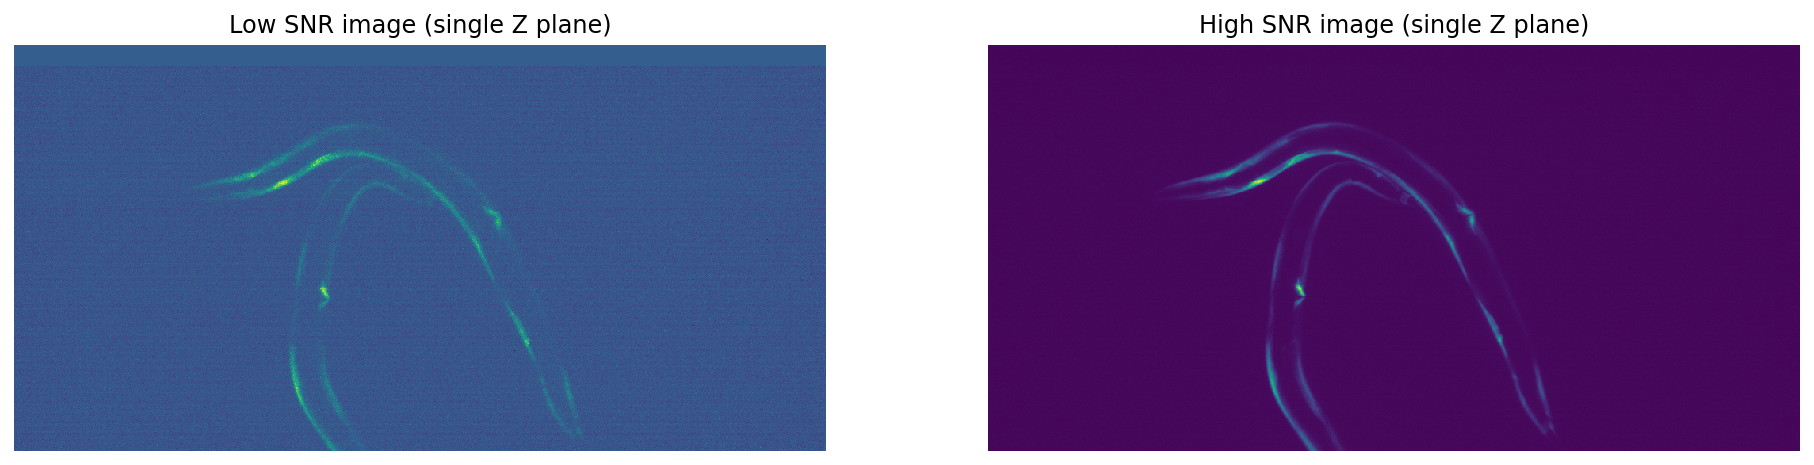

In [4]:
#@markdown ###Path to training images:

# base folder of GT and low images
base = "/content"

# low SNR images
Training_source = "/content/gdrive/My Drive/cloud_colab/CARE (3D)/WORMS/TRAIN/Low" #@param {type:"string"}
lowfile = Training_source+"/*.tif"
# Ground truth images
Training_target = "/content/gdrive/My Drive/cloud_colab/CARE (3D)/WORMS/TRAIN/High" #@param {type:"string"}
GTfile = Training_target+"/*.tif"

#prediction = "/content/gdrive/My Drive/Work/manuscript/Ongoing Projects/Zero-Cost Deep-Learning to Enhance Microscopy/Notebooks to be tested/CARE 3D/Filopodia_junctions/prediction" #@param {type:"string"}
#results = "/content/gdrive/My Drive/Work/manuscript/Ongoing Projects/Zero-Cost Deep-Learning to Enhance Microscopy/Notebooks to be tested/CARE 3D/Filopodia_junctions/results" #@param {type:"string"}

# model name and path
#@markdown ###Name of the model and path to model folder:
model_name = "3Dmodel_5stack" #@param {type:"string"}
model_path = "/content/gdrive/My Drive/cloud_colab/CARE_WORMS1/models/3D_model" #@param {type:"string"}

#@markdown ####Use one image of the training set for visual assessment of the training:
Visual_validation_after_training = True #@param {type:"boolean"}

# create the training data file into model_path folder.
training_data = model_path+"/my_training_data.npz"

# other parameters for training.
#@markdown ###Training Parameters
#@markdown Number of epochs:

number_of_epochs =  100#@param {type:"number"}
#epochs = number_of_epochs

#@markdown Patch size (pixels) and number
patch_size =  64#@param {type:"number"} # pixels in
patch_height =  16#@param {type:"number"}
number_of_patches =  1024#@param {type:"number"}


#@markdown ###Advanced Parameters

Use_Default_Advanced_Parameters = True #@param {type:"boolean"}
#@markdown ###If not, please input:

batch_size =  32#@param {type:"number"}
percentage_validation =  15 #@param {type:"number"}
number_of_steps =  300#@param {type:"number"}


if (Use_Default_Advanced_Parameters): 
  print("Default advanced parameters enabled")
  batch_size = 64
  percentage_validation = 10

percentage = percentage_validation/100

#here we check that no model with the same name already exist, if so delete
if os.path.exists(model_path+'/'+model_name):
  shutil.rmtree(model_path+'/'+model_name)
  

random_choice=random.choice(os.listdir(Training_source))
x = imread(Training_source+"/"+random_choice)

os.chdir(Training_target)
y = imread(Training_target+"/"+random_choice)

f=plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(x[2], interpolation='nearest')
plt.axis('off')
plt.title('Low SNR image (single Z plane)');
plt.subplot(1,2,2)
plt.imshow(y[2], interpolation='nearest')
plt.axis('off')
plt.title('High SNR image (single Z plane)');

#protection for next cell
if (Visual_validation_after_training):
  Cell_executed = 0

# **4. Train the network**
---

## **4.1. Prepare the training data and model for training**
---
<font size = 4>Here, we use the information from 3. to build the model and convert the training data into a suitable format for training.

    4 raw images x    1 transformations   =     4 images
    4 images     x 1024 patches per image =  4096 patches in total
Input data:
/content: target='/content/gdrive/My Drive/cloud_colab/CARE (3D)/WORMS/TRAIN/High', sources=['/content/gdrive/My Drive/cloud_colab/CARE (3D)/WORMS/TRAIN/Low'], axes='ZYX', pattern='*.tif*'
Transformations:
1 x Identity
Patch size:
16 x 64 x 64


100%|██████████| 4/4 [00:45<00:00, 11.37s/it]


Saving data to /content/gdrive/My Drive/cloud_colab/CARE_WORMS1/models/3D_model/my_training_data.npz.
shape of X,Y = (4096, 1, 16, 64, 64)
axes  of X,Y = SCZYX
peak memory: 3435.99 MiB, increment: 0.12 MiB
Creating 3D training dataset
number of training images:	 3686
number of validation images:	 410
image size (3D):		 (16, 64, 64)
axes:				 SZYXC
channels in / out:		 1 / 1
peak memory: 4888.65 MiB, increment: -0.16 MiB
58
Config(axes='ZYXC', n_channel_in=1, n_channel_out=1, n_dim=3, probabilistic=False, train_batch_size=64, train_checkpoint='weights_best.h5', train_checkpoint_epoch='weights_now.h5', train_checkpoint_last='weights_last.h5', train_epochs=100, train_learning_rate=0.0004, train_loss='mae', train_reduce_lr={'factor': 0.5, 'patience': 10, 'min_delta': 0}, train_steps_per_epoch=58, train_tensorboard=True, unet_input_shape=(None, None, None, 1), unet_kern_size=3, unet_last_activation='linear', unet_n_depth=2, unet_n_first=32, unet_residual=True)
Instructions for updating:
If 

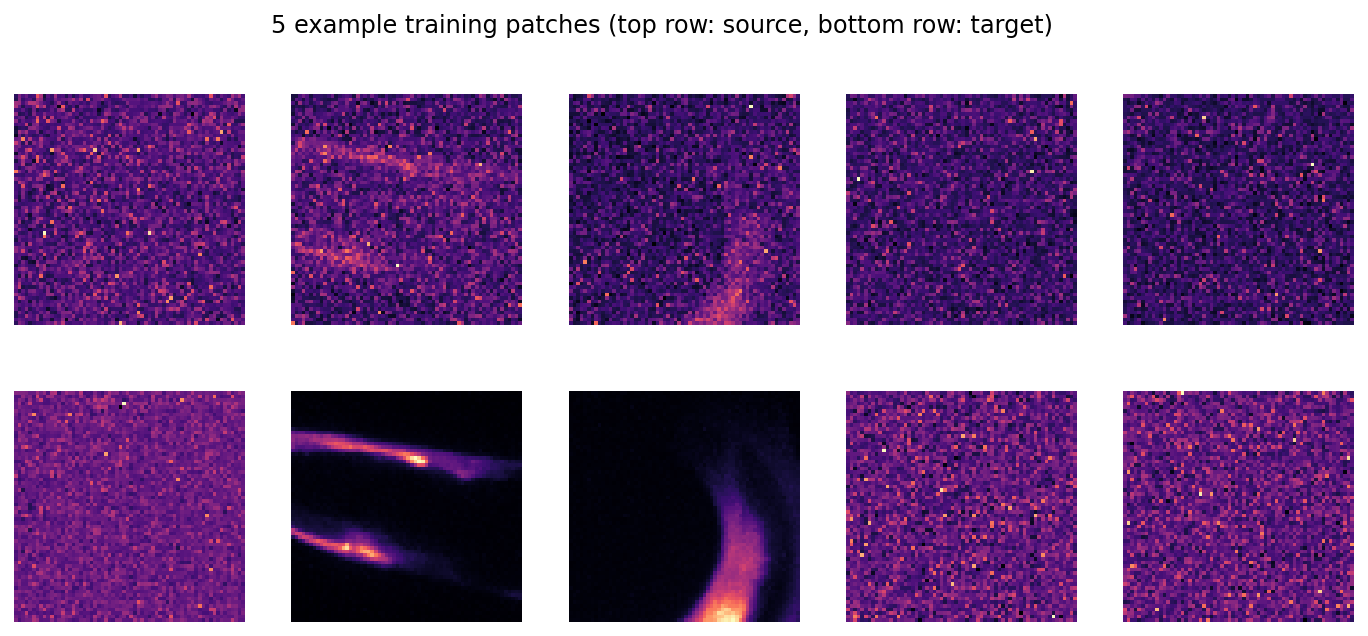

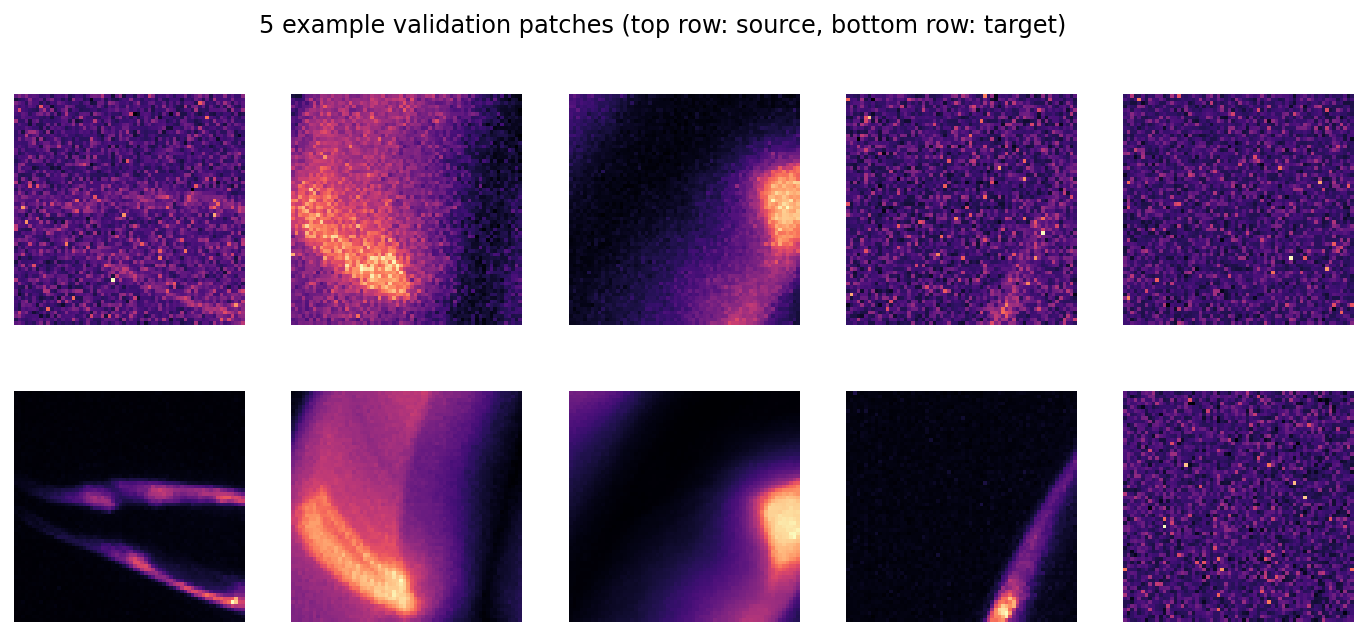

In [5]:
#@markdown ##Create the model and dataset objects
# The code in this cell is inspired by that from the authors' repository (https://github.com/CSBDeep/CSBDeep).

if (Visual_validation_after_training):
  if Cell_executed == 0 :

#Create a temporary file folder for immediate assessment of training results:
#If the folder still exists, delete it
    if os.path.exists(Training_source+"/temp"):
      shutil.rmtree(Training_source+"/temp")

    if os.path.exists(Training_target+"/temp"):
      shutil.rmtree(Training_target+"/temp")

    if os.path.exists(model_path+"/temp"):
      shutil.rmtree(model_path+"/temp")

#Create directories to move files temporarily into for assessment
    os.makedirs(Training_source+"/temp")
    os.makedirs(Training_target+"/temp")
    os.makedirs(model_path+"/temp")
    #list_source = os.listdir(os.path.join(Training_source))
    #list_target = os.listdir(os.path.join(Training_target))
#Move files into the temporary source and target directories:
    shutil.move(Training_source+"/"+random_choice, Training_source+'/temp/'+random_choice)
    shutil.move(Training_target+"/"+random_choice, Training_target+'/temp/'+random_choice)

# RawData Object

# This object holds the image pairs (GT and low), ensuring that CARE compares corresponding images.
# This file is saved in .npz format and later called when loading the trainig data.

raw_data = RawData.from_folder (
    basepath    = base,
    source_dirs = [Training_source],
    target_dir  = Training_target,
    axes        = 'ZYX',
    pattern='*.tif*'
)
X, Y, XY_axes = create_patches (
    raw_data            = raw_data,
    patch_size          = (patch_height,patch_size,patch_size),
    n_patches_per_image = number_of_patches, 
    save_file           = training_data,
)

assert X.shape == Y.shape
print("shape of X,Y =", X.shape)
print("axes  of X,Y =", XY_axes)

%memit 
print ('Creating 3D training dataset')

# Load Training Data
(X,Y), (X_val,Y_val), axes = load_training_data(training_data, validation_split=percentage, verbose=True)
c = axes_dict(axes)['C']
n_channel_in, n_channel_out = X.shape[c], Y.shape[c]

#Plot example patches

#plot of training patches.
plt.figure(figsize=(12,5))
plot_some(X[:5],Y[:5])
plt.suptitle('5 example training patches (top row: source, bottom row: target)');

#plot of validation patches
plt.figure(figsize=(12,5))
plot_some(X_val[:5],Y_val[:5])
plt.suptitle('5 example validation patches (top row: source, bottom row: target)');

%memit 

#Here we automatically define number_of_step in function of training data and batch size
if (Use_Default_Advanced_Parameters): 
  number_of_steps= int(X.shape[0]/batch_size)+1

print(number_of_steps)

#Config Object:

#Here, we create the default Config object which sets the hyperparameters of the network training.
#In this case, we use the default settings from the paper. 
#More experienced users may want to experiment with these settings.

config = Config(axes, n_channel_in, n_channel_out, train_steps_per_epoch=number_of_steps, train_epochs=number_of_epochs, train_batch_size=batch_size)
print(config)
vars(config)

# Compile the CARE model for network training

model_training= CARE(config, model_name, basedir=model_path)

# Compile the CARE model for network training
if (Visual_validation_after_training):
  Cell_executed = 1

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **4.2. Train the network**
---
<font size = 4>When playing the cell below you should see updates after each epoch (round). Network training can take some time.

<font size = 4>* **CRITICAL NOTE:** Google Colab has a time limit for processing (to prevent using GPU power for datamining). Training time must be less than 12 hours! If training takes longer than 12 hours, please decrease the number of epochs or number of patches. Another way circumvent this is to save the parameters of the model after training and start training again from this point.


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




Epoch 1/100
58/58 [==============================] - 147s 3s/step - loss: 0.1779 - mse: 0.0720 - mae: 0.1779 - val_loss: 0.1446 - val_mse: 0.0501 - val_mae: 0.1446

Epoch 2/100
58/58 [==============================] - 126s 2s/step - loss: 0.1207 - mse: 0.0447 - mae: 0.1207 - val_loss: 0.0975 - val_mse: 0.0378 - val_mae: 0.0975
Epoch 3/100
58/58 [==============================] - 126s 2s/step - loss: 0.1016 - mse: 0.0411 - mae: 0.1017 - val_loss: 0.0970 - val_mse: 0.0356 - val_mae: 0.0970
Epoch 4/100
58/58 [==============================] - 126s 2s/step - loss: 0.0886 - mse: 0.0363 - mae: 0.0887 - val_loss: 0.0891 - val_mse: 

100%|██████████| 32/32 [00:20<00:00,  1.54it/s]


Time elapsed: 3.0 hour(s) 34.0 min(s) 25 sec(s)


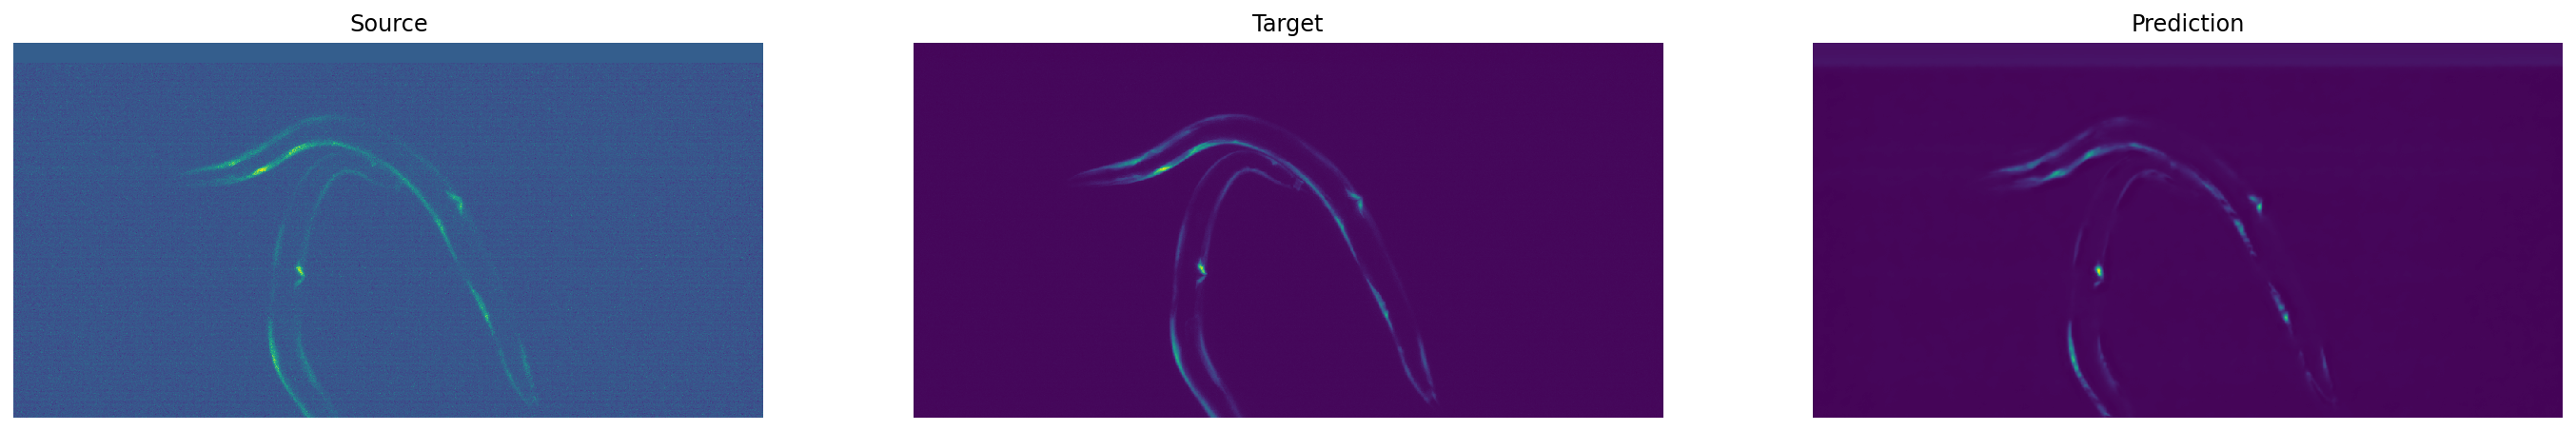

In [6]:
import time
start = time.time()

#@markdown ##Start Training

# Start Training
history = model_training.train(X,Y, validation_data=(X_val,Y_val))

print("Training, done.")


if (Visual_validation_after_training):
  if Cell_executed == 1:
#Here we predict one image
    validation_image = imread(Training_source+"/temp/"+random_choice)
    validation_test = model_training.predict(validation_image, axes='ZYX', n_tiles=(2,4,4))
    os.chdir(model_path+"/temp/")
    imsave(random_choice+"_predicted.tif",validation_test)
#Source
    I = imread(Training_source+"/temp/"+random_choice)
#Target
    J = imread(Training_target+"/temp/"+random_choice)
#Prediction
    K = imread(model_path+"/temp/"+random_choice+"_predicted.tif")
#Make a plot
    f=plt.figure(figsize=(24,12))
    plt.subplot(1,3,1)
    plt.imshow(I[2], interpolation='nearest')
    plt.title('Source')
    plt.axis('off');

    plt.subplot(1,3,2)
    plt.imshow(J[2], interpolation='nearest')
    plt.title('Target')
    plt.axis('off');

    plt.subplot(1,3,3)
    plt.imshow(K[2], interpolation='nearest')
    plt.title('Prediction')
    plt.axis('off');

#Move the temporary files back to their original folders
    shutil.move(Training_source+'/temp/'+random_choice, Training_source+"/"+random_choice)
    shutil.move(Training_target+'/temp/'+random_choice, Training_target+"/"+random_choice)

#Delete the temporary folder
    shutil.rmtree(Training_target+'/temp')
    shutil.rmtree(Training_source+'/temp')

#protection against removing data
  Cell_executed = 0


# Displaying the time elapsed for training
dt = time.time() - start
min, sec = divmod(dt, 60) 
hour, min = divmod(min, 60) 
print("Time elapsed:",hour, "hour(s)",min,"min(s)",round(sec),"sec(s)")


## **4.3. Evaluate the training**
---

<font size = 4>It is good practice to evaluate the training progress by comparing the training loss with the validation loss. The latter is a metric which shows how well the network performs on a subset of unseen data which is set aside from the training dataset. For more information on this, see for example [this review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6381354/) by Nichols *et al.*

<font size = 4>**Loss** <code>(loss)</code> describes an error value after each epoch for the difference between the model's prediction and its ground-truth ('GT') target.

<font size = 4>**Validation loss** <code>(val_loss)</code> describes the same error value between the model's prediction on a validation image (taken from 'low') and compared to it's target (from 'GT').

<font size = 4>During training both values should decrease before reaching a minimal value which does not decrease further even after more training. Comparing the development of the validation loss with the training loss can give insights into the model's performance.

<font size = 4>Decreasing **loss** and **validation loss** indicates that training is still necessary and increasing the `number_of_epochs` is recommended. Note that the curves can look flat towards the right side, just because of the y-axis scaling. The network has reached convergence once the curves flatten out. After this point no further training is required. If the **validation loss** suddenly increases again an the **loss** simultaneously goes towards zero, it means that the network is overfitting to the training data. In other words the network is remembering the exact patterns from the training data and no longer generalizes well to unseen data. In this case the training dataset has to be increased.

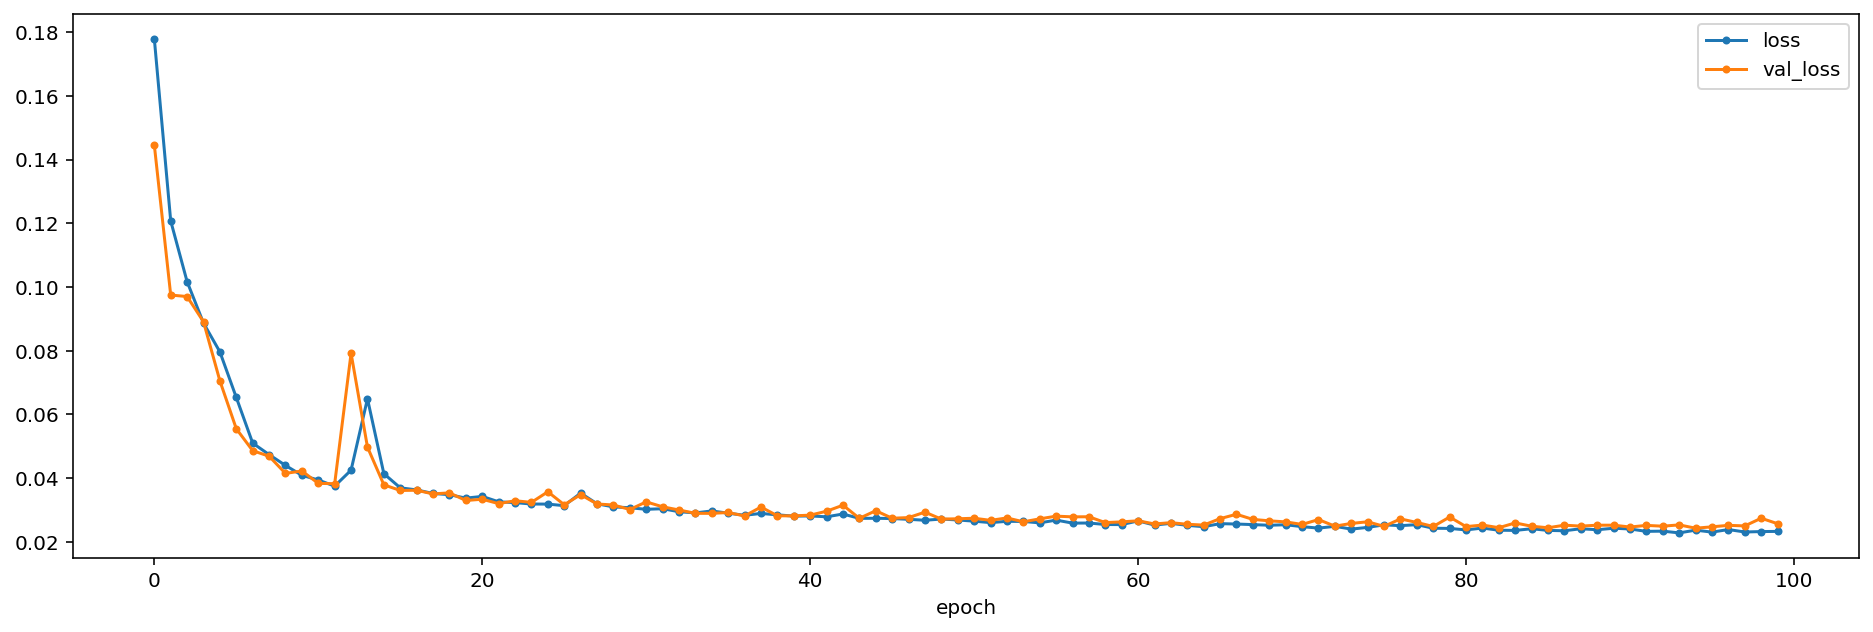

In [7]:
#@markdown ##Play the cell to show a plot of training errors vs. epoch number

# Create figure framesize
errorfigure = plt.figure(figsize=(16,5))

# Choose the values you wish to compare. 
# For example, If you wish to see another values, just replace 'loss' to 'dist_loss'
plot_history(history,['loss','val_loss']); 
errorfigure.savefig(model_path+'/training evaluation.tif') 

# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# The figure is saved into content/ as training evaluation.csv (refresh the Files if needed). 
RESULTS = model_path+'/training evaluation.csv'
with open(RESULTS, 'w') as f:
    for key in hist_df.keys():
        f.write("%s,%s\n"%(key,hist_df[key]))

## **4.4. Export model to be used with *CSBDeep Fiji plugins* and *KNIME* workflows (Experimental !!!)**
---

<font size = 4>This allows you to save the trained model in a format where it can be used in the CSBDeep Fiji Plugin. See https://github.com/CSBDeep/CSBDeep_website/wiki/Your-Model-in-Fiji for details.

<font size = 4>After saving the model to your drive, download the .zip file from your google drive. Do this from your Google Drive and not in the colab interface as this takes very long.

In [0]:
#@markdown ##Play this cell to save a Fiji compatible model to Google Drive.

# exports the trained model to Fiji.
# The code is from (https://github.com/CSBDeep/CSBDeep).
model_training.export_TF()

## **4.5. Download your model(s) from Google Drive**
---
<font size = 4>The model and its parameters have been saved to your **model_path** on your Google Drive. It is however wise to download the folder as all data can be erased at the next training if using the same folder.

# **5. Use the network**

---

<font size = 4>In this section the unseen data is processed using the trained model (in section 4). First, your unseen images are uploaded and prepared for prediction. After that your trained model from section 4 is activated and finally saved into your Google Drive.

## **5.1. Generate prediction from test dataset**
---

<font size = 4>The current trained model (from section 4.2) can now be used to process images. If you want to use an older model, untick the **Use_the_current_trained_model** box and enter the name and path of the model to use. Predicted output images are saved in your **Result_folder** folder as restored image stacks (ImageJ-compatible TIFF images).

<font size = 4>**`Test_data_folder`:** This folder should contain the images that you want to use your trained network on for processing.

<font size = 4>**`Result_folder`:** This folder will contain the predicted output images.

In [12]:
from csbdeep.utils import normalize, plot_some
import scipy.stats as sc
#Activate the pretrained model. 
#model_training = CARE(config=None, name=model_name, basedir=model_path)

#@markdown ##Provide the path to your dataset and to the folder where the prediction will be saved, then play the cell to predict output on your unseen images.

Test_data_folder = "/content/gdrive/My Drive/cloud_colab/CARE (3D)/WORMS/TEST/Low" #@param {type:"string"}
Result_folder = "/content/gdrive/My Drive/cloud_colab/CARE (3D)/WORMS/RESULTS" #@param {type:"string"}
Target_folder = "/content/gdrive/My Drive/cloud_colab/CARE (2D)/Test/GT" #@param {type:"string"}


# model name and path
#@markdown ###Do you want to use the current trained model?
Use_the_current_trained_model = True #@param {type:"boolean"}

#@markdown ###If not, provide the name of the model and path to model folder:
#@markdown #####During the training, the model files are automatically saved inside of a folder named by the parameter 'model_name' (see section 3). Please provide the name of this folder as 'inference_model_name' and the path to its parent folder in 'inference_model_path'. 


inference_model_name = "" #@param {type:"string"}
inference_model_path = "" #@param {type:"string"}

if (Use_the_current_trained_model): 
  print("Using current trained network")
  inference_model_name = model_name
  inference_model_path = model_path
  print("MODEL USED: " + model_path + model_name)
#Activate the pretrained model. 
model=CARE(config=None, name=inference_model_name, basedir=inference_model_path)

print("Restoring images...")

thisdir = Path(Test_data_folder)
outputdir = Path(Result_folder)
suffix = '.tif'

# r=root, d=directories, f = files
for r, d, f in os.walk(thisdir):
    for file in f:
        if ".tif" in file:
            print(os.path.join(r, file))

for r, d, f in os.walk(thisdir):
  for file in f:
    base_filename = os.path.basename(file)
    input_train = imread(os.path.join(r, file))
    y = imread(os.path.join(Target_folder,file))
    pred_train = model.predict(input_train, axes='ZYX', n_tiles=(2,4,4))
    save_tiff_imagej_compatible(os.path.join(outputdir, base_filename), pred_train, axes='ZYX')         
    plt.figure(figsize=(15,10))
    print(x.shape)
    plot_some(np.stack([x,pred_train,y]),
          title_list=[['low','CARE','GT']], 
          pmin=2,pmax=99.8);
    pear = sc.pearsonr(normalize(y[0,:,:],0.01,99.9).flatten(), normalize(pred_train[0,:,:],0.01,99.9).flatten())
    plt.figure(figsize=(10,5))
    row = 300
    for _x,_name in zip((input_train,pred_train,y),('low','CARE','GT')):
      plt.plot(normalize(_x[0,:,:],0.01,99.9)[row,:], label = _name, lw = 2) #You compare the signal row by row for each image
      plt.ylabel("Intensity")
      plt.xlabel("pixels in row = " + str(row))
      plt.title("Pearson correlation = " + str(pear[0]))
plt.legend();
print("Images saved into the result folder:", Result_folder)

#Display an example
random_choice=random.choice(os.listdir(Test_data_folder))
x = imread(Test_data_folder+"/"+random_choice)

os.chdir(Result_folder)
y = imread(Result_folder+"/"+random_choice)

f=plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(x[2], interpolation='nearest')
plt.axis('off')
plt.title('Noisy Input (single Z plane)');
plt.subplot(1,2,2)
plt.imshow(y[2], interpolation='nearest')
plt.axis('off')
plt.title('Prediction (single Z plane)');


Using current trained network
MODEL USED: /content/gdrive/My Drive/cloud_colab/CARE_WORMS1/models/3D_model3Dmodel_5stack
Loading network weights from 'weights_best.h5'.
Restoring images...
/content/gdrive/My Drive/cloud_colab/CARE (3D)/WORMS/TEST/Low/8.tif
/content/gdrive/My Drive/cloud_colab/CARE (3D)/WORMS/TEST/Low/9.tif


100%|██████████| 32/32 [00:19<00:00,  1.61it/s]


(100, 512, 1024)


ValueError: ignored

<Figure size 1080x720 with 0 Axes>

## **5.2. Download your predicted output**
---

<font size = 4>**Store your data** and ALL its results elsewhere by downloading it from Google Drive and after that clean the original folder tree (datasets, results, trained model etc.) if you plan to train or use new networks. Please note that notebook will otherwise **OVERWRITE** all files which have the same name.